In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from collections import Counter
from files.sb_utils import save_file
warnings.simplefilter(action="ignore", category=UserWarning)

In [248]:
#delete path for privacy reasons
#load in anime dataset
anime = pd.read_csv(r'C:\Users\sydne\Desktop\Springboard\Cap2\Data\anime_data.csv')

In [249]:
#load manga data 
#delete path for privacy after EDA
manga = pd.read_csv(r'C:\Users\sydne\Desktop\Springboard\Cap2\Data\manga_data.csv')

Load in Popular and least_popular_anime and manga datasets

In [250]:
popular_anime = pd.read_csv('..\Data\popular_anime.csv')

In [251]:
popular_manga = pd.read_csv('..\Data\popular_manga.csv')

For Now,Focus on the Anime Datasets: popular_anime and least_anime. 

In [255]:
popular_anime.dtypes

anime_id          int64
title            object
type             object
score           float64
scored_by         int64
status           object
episodes        float64
source           object
rating           object
start_year      float64
genres           object
themes           object
demographics     object
studios          object
producers        object
licensors        object
dtype: object

Use .describe() to see the summary statistics 

In [257]:
popular_anime.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,4409.0,20772.579950,17727.319645,1.0,2962.0,16241.0,37086.00,55818.0
score,4409.0,7.511592,0.410965,7.0,7.2,7.4,7.73,9.1
scored_by,4409.0,89696.070311,206063.008807,127.0,5214.0,20336.0,76434.00,2685033.0
episodes,4380.0,15.637215,38.415299,1.0,1.0,11.0,15.00,1787.0
start_year,4393.0,2010.492602,10.162299,1963.0,2006.0,2013.0,2018.00,2023.0


Plot variables of each dataset

array([[<Axes: title={'center': 'anime_id'}>,
        <Axes: title={'center': 'score'}>],
       [<Axes: title={'center': 'scored_by'}>,
        <Axes: title={'center': 'episodes'}>],
       [<Axes: title={'center': 'start_year'}>, <Axes: >]], dtype=object)

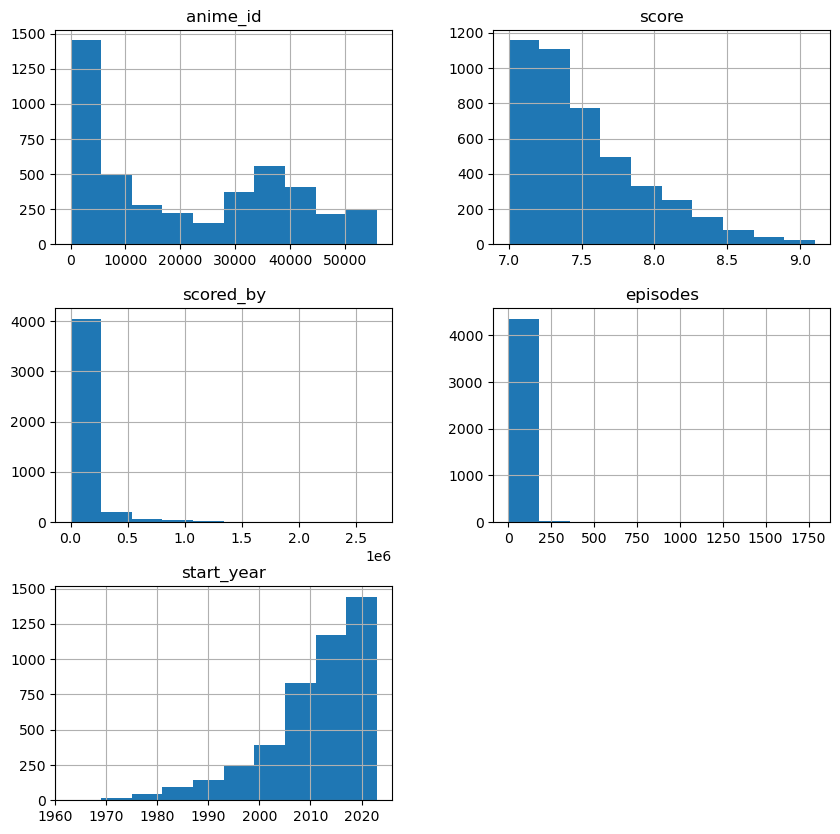

In [259]:
popular_anime.hist(figsize = (10,10))

From this plot, we can see that from the more popular anime that most score around around 7 or 8, that episodes don't exceed 250, and that the year 2020 seemingly had the most popular animes

In [261]:
anime['start_year'].value_counts()

start_year
2017.0    771
2018.0    760
2016.0    758
2021.0    724
2014.0    723
         ... 
1952.0      1
1926.0      1
1945.0      1
1948.0      1
1949.0      1
Name: count, Length: 93, dtype: int64

Turns out that 2017 was the year when most anime shows debuted. But what about 2020and beyond? Let's check

In [262]:
anime_2020 = anime[anime['start_year']>=2020]
anime_2020['start_year'].value_counts()

start_year
2021.0    724
2022.0    672
2020.0    644
2023.0    325
Name: count, dtype: int64

Now we know that 2020 had 644 animes premier, while 2021 had 724. How does that stack between our two data sets?

In [263]:
popular_anime['start_year'].value_counts()

start_year
2021.0    248
2022.0    227
2017.0    217
2018.0    217
2016.0    212
2014.0    210
2019.0    204
2015.0    199
2012.0    196
2013.0    193
2020.0    192
2011.0    165
2009.0    160
2010.0    152
2008.0    149
2007.0    140
2023.0    139
2006.0    122
2005.0    108
2004.0     90
2002.0     70
2003.0     69
2001.0     60
2000.0     51
1999.0     51
1995.0     49
1996.0     47
1998.0     44
1993.0     37
1997.0     35
1994.0     34
1988.0     26
1992.0     26
1991.0     25
1990.0     24
1989.0     24
1987.0     22
1981.0     18
1983.0     17
1985.0     17
1982.0     16
1978.0     14
1986.0     14
1984.0     13
1980.0     12
1979.0      9
1975.0      5
1969.0      5
1977.0      4
1973.0      4
1976.0      3
1974.0      3
1968.0      2
1971.0      1
1970.0      1
1963.0      1
Name: count, dtype: int64

Now we can see, that the year that had the least liked anime start was 2017, while the more popular animes started in 2021! 

What about our categorical varibles? Let's see how they look using sns.catplot

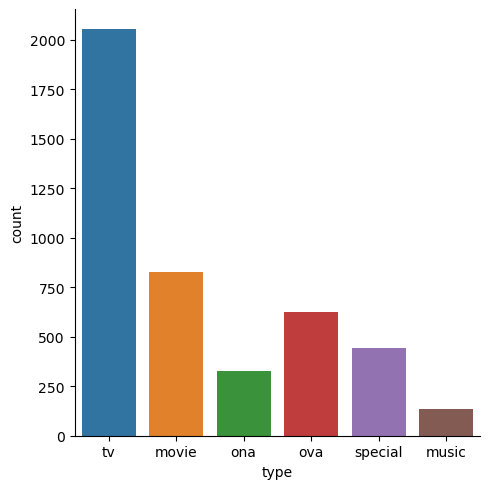

In [265]:
#popular anime types
sns.catplot(x='type', data=popular_anime, kind = 'count')

From the popular_anime dataset, tv shows are more common and music videos are less so. 

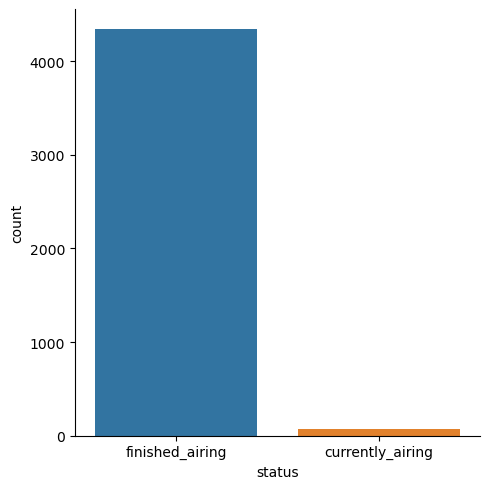

In [266]:
#popular_anime status, is the ahow still airing
sns.catplot(x='status', data=popular_anime, kind = 'count')

Most popular animes are no longer airing and are considered 'Finished'

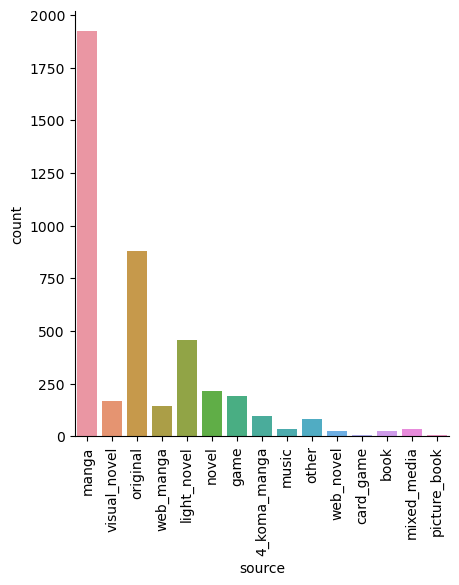

In [267]:
#popular anime source, did the show come from a manga, light novel or something else?
s= sns.catplot(x='source', data=popular_anime, kind = 'count')
s.set_xticklabels(rotation=90)

Most popular animes originated as a manga

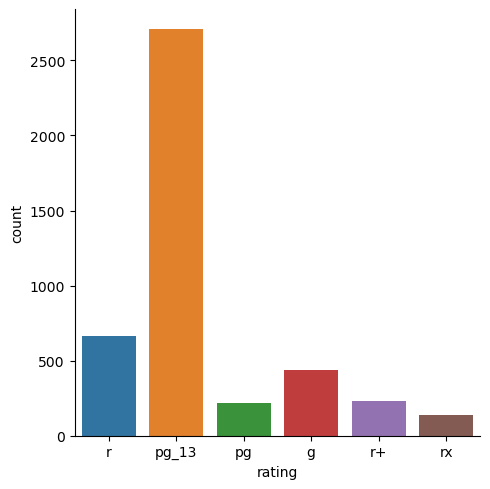

In [268]:
sns.catplot(x='rating',data=popular_anime, kind = 'count')

Pg-13 is a more common rating for popular anime

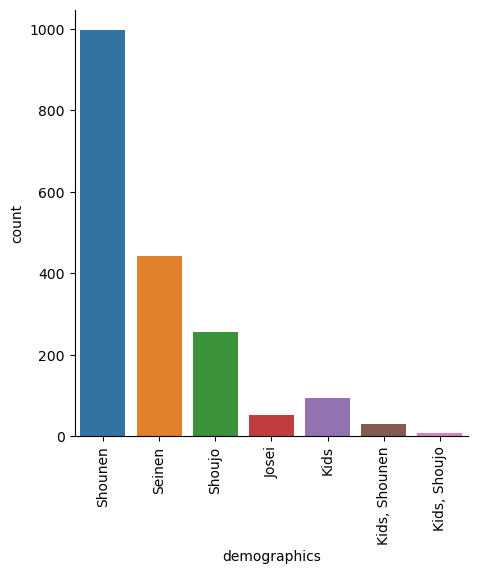

In [269]:
s=sns.catplot(x='demographics', data=popular_anime, kind = 'count')
s.set_xticklabels(rotation=90)


It seems that a no demographic, or an unlisted demographic is most common for popular anime, followed by Shounen anime. the least popular demographic within the popular_anime dataset is [kid's, Shoujo]

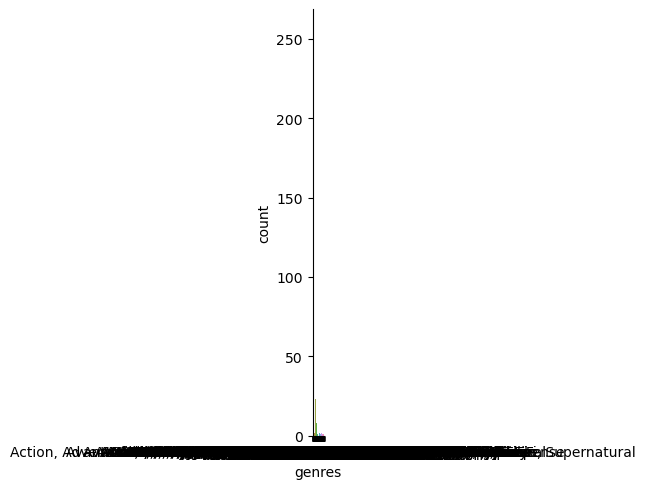

In [270]:
sns.catplot(x='genres', data=popular_anime, kind = 'count')


This plot doesn't help us narrow down which genre in the popular_anime is most common, let's use a value count to see

In [271]:
popular_anime['genres'].value_counts()

genres
Comedy                                             256
Action, Adventure, Fantasy                         162
Sports                                             143
Comedy, Romance                                    132
Hentai                                             119
                                                  ... 
Adventure, Comedy, Mystery, Sports                   1
Action, Fantasy, Girls Love                          1
Boys Love, Drama, Romance, Sci-Fi                    1
Action, Adventure, Award Winning, Comedy, Ecchi      1
Action, Comedy, Fantasy, Mystery                     1
Name: count, Length: 573, dtype: int64

Looks like comedy is a favorite! followed by a blank genre

Let's continue looking at our categorical variables 

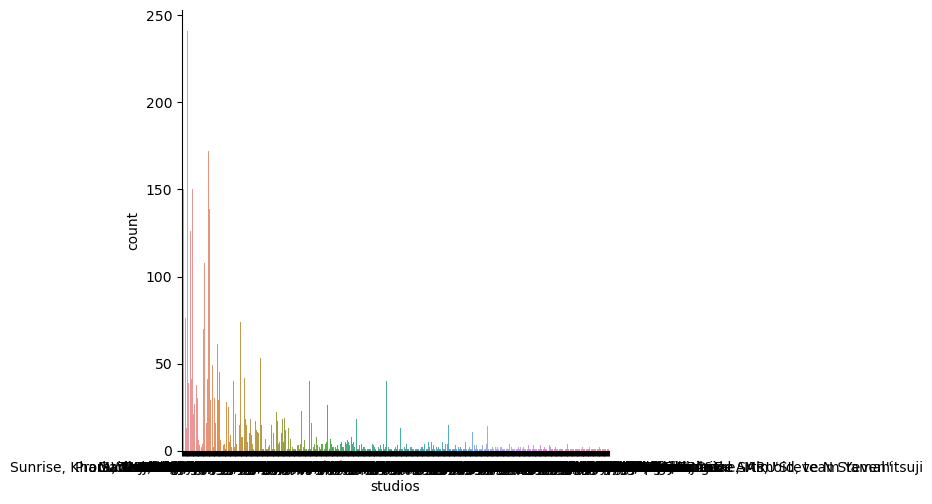

In [272]:
sns.catplot(x='studios', data=popular_anime, kind = 'count')


Similar problem has occured let's check value count for studios

In [273]:
popular_anime['studios'].value_counts()

studios
Sunrise                                                 241
Toei Animation                                          233
J.C.Staff                                               172
Production I.G                                          150
Madhouse                                                150
                                                       ... 
Grouper Productions                                       1
Bones, Production Reed, The Answer Studio, WAO World      1
SILVER LINK., Studio Palette                              1
Gainax, J.C.Staff                                         1
Delight Animation                                         1
Name: count, Length: 507, dtype: int64

Out of curiosity, I want to see how many animes a studio has worked on, whether it be on their own or with another studio, I will continue to do something similiar for producers, licensors and themes, if necessary.

         unique_studios  studio_count
0                 Bones           104
1              Madhouse           164
2            Wit Studio            47
3             White Fox            27
4       Kyoto Animation            86
..                  ...           ...
490  Tele-Cartoon Japan             1
491         BUILD DREAM             1
492        Xuni Ying Ye             1
493        Studio Junio             1
494   Delight Animation             1

[495 rows x 2 columns]


<Axes: xlabel='unique_studios', ylabel='studio_count'>

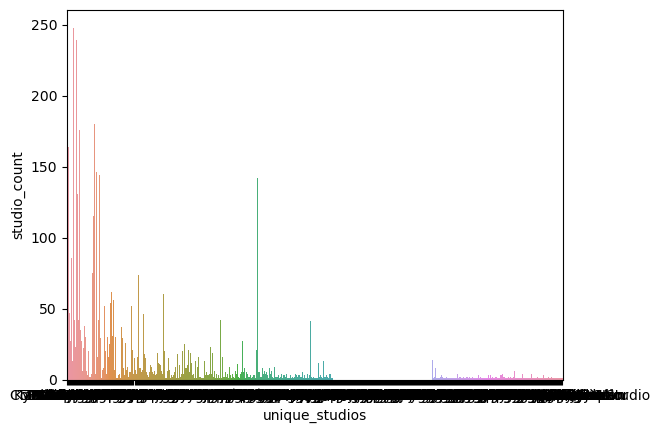

In [295]:
#popular_anime['studios'].apply(type).value_counts()
popular_anime['studios'].fillna('blank', inplace = True)
popular_anime[popular_anime['studios']=='blank']
Studios = [y for x in popular_anime['studios'] for y in x.split(',')]
unique_studio = []
studios_count =[]
for x in Studios:
    if x not in unique_studio:
        unique_studio.append(x)

for x in unique_studio:
    studios_count.append(Studios.count(x))

dict = {'unique_studios': unique_studio, 'studio_count': studios_count}
df = pd.DataFrame(dict)
print(df)
sns.barplot(x = 'unique_studios', y = 'studio_count', data = df )



In [276]:
df[df['unique_studios']=="Sunrise"]

,unique_studios,studio_count
6,Sunrise,248


It appears there is a slight difference with the 'Worked overall' vs the given studios within the dataset. 

producers
Aniplex                                                                                        55
Pink Pineapple                                                                                 51
Bandai Visual                                                                                  34
Tencent Penguin Pictures                                                                       33
Fuji TV                                                                                        30
                                                                                               ..
Shochiku, Movic, Tokyo MX, Fields, Cygames, Tencent Japan, dugout, Happinet Media Marketing     1
Aniplex, Kodansha, Studio Mausu, Tokyo MX, NetEase                                              1
Pony Canyon, AT-X, KlockWorx, SoftBank Creative                                                 1
Bandai Visual, Shochiku, Victor Entertainment, Kodansha                                         1
Mushi Prod

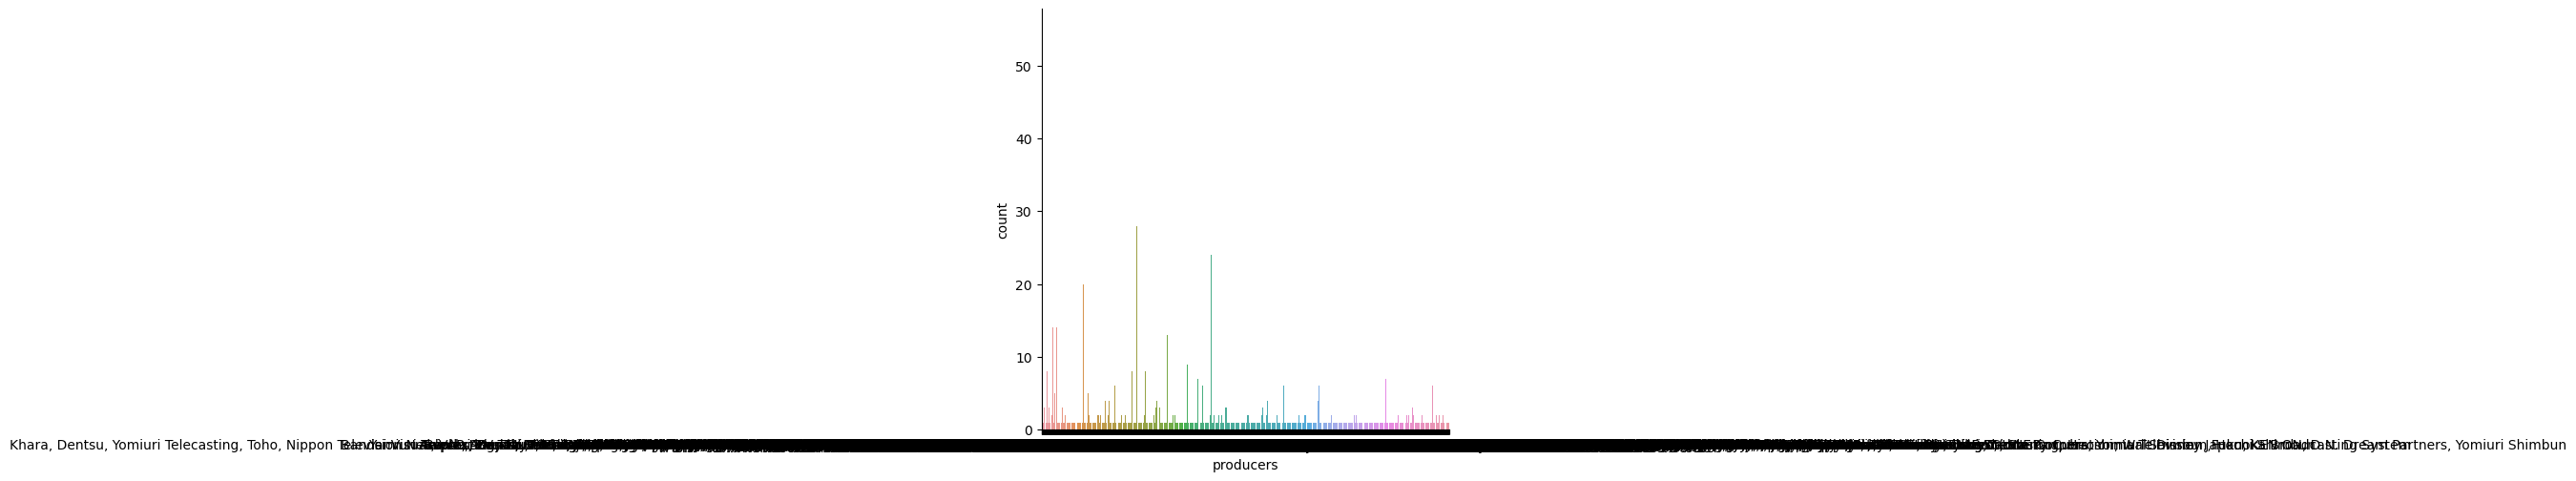

In [285]:
sns.catplot(x='producers', data=popular_anime, kind = 'count')

popular_anime['producers'].value_counts()

                   unique_producers  producer_count
0                           Aniplex             343
1                       Square Enix              51
2      Mainichi Broadcasting System             138
3                    Studio Moriken               1
4                               VAP              74
...                             ...             ...
1032                          GKIDS               1
1033                 Youliao Studio               1
1034                          Youku               2
1035           Wonder Cat Animation               1
1036               Mushi Production               1

[1037 rows x 2 columns]


<Axes: xlabel='unique_producers', ylabel='producer_count'>

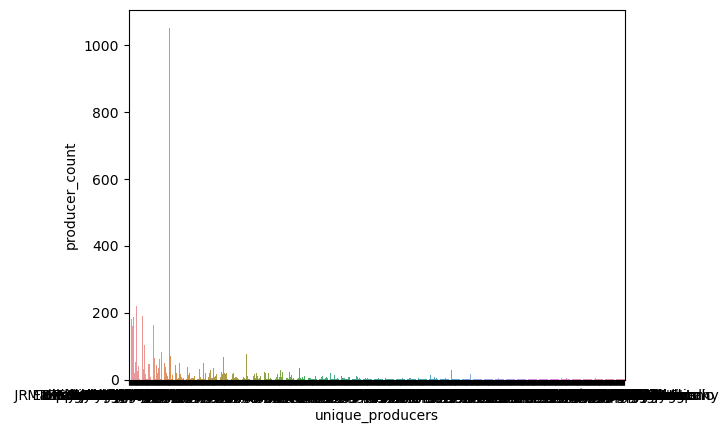

In [293]:
popular_anime['producers'].fillna('blank', inplace = True)
popular_anime[popular_anime['producers']=='blank']
Producers = [y for x in popular_anime['producers'] for y in x.split(',')]
unique_producer = []
producer_count =[]
for x in Producers:
    if x not in unique_producer:
        unique_producer.append(x)

for x in unique_producer:
    producer_count.append(Producers.count(x))

dict = {'unique_producers': unique_producer, 'producer_count': producer_count}
df2 = pd.DataFrame(dict)
print(df2)
sns.barplot(x = 'unique_producers', y = 'producer_count', data = df2 )


In [291]:
df[df['unique_producers']== 'GKIDS']

,unique_producers,producer_count
1032,GKIDS,1


Wow! the jump of how many anime aniplex has produced on overall to what they produced solo is massive! the plots also can a jump from the data all being close together to where one producer has a massive lead compared to others. 

licensors
Funimation                                             559
Sentai Filmworks                                       461
Aniplex of America                                     166
Discotek Media                                         130
VIZ Media                                              109
                                                      ... 
Saban Entertainment, Flatiron Film Company               1
Funimation, Bandai Entertainment, DreamWorks             1
Eleven Arts, Ponycan USA                                 1
ADV Films, DiC Entertainment, Flatiron Film Company      1
Sentai Filmworks, Saban Entertainment                    1
Name: count, Length: 188, dtype: int64

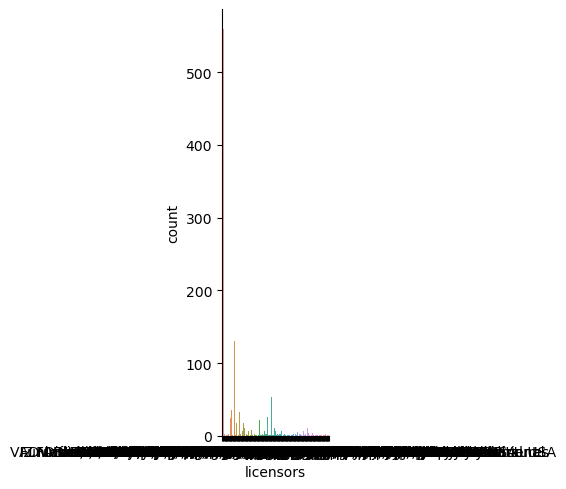

In [297]:
sns.catplot(x='licensors', data=popular_anime, kind = 'count')

popular_anime['licensors'].value_counts()

It looks like Funimation, is far above other licensors. Again, let's look to see the overall between licensors.

In [327]:
popular_anime['licensors'].fillna('blank', inplace = True)
popular_anime[popular_anime['licensors']=='blank']
Licensors = [y for x in popular_anime['licensors'] for y in x.split(',')]
unique_licensor = []
licensor_count =[]
for x in Licensors:
    if x not in unique_licensor:
        unique_licensor.append(x)

for x in unique_licensor:
    licensor_count.append(Licensors.count(x))

dict = {'unique_licensor': unique_licensor, 'licensor_count': licensor_count}
df3 = pd.DataFrame(dict)
print(df3)



             unique_licensor  licensor_count
0                 Funimation             699
1         Aniplex of America              14
2                  VIZ Media             134
3                Eleven Arts              14
4                  NYAV Post              23
..                       ...             ...
92         Bandai Visual USA               1
93           Anime Midstream               3
94  Dentsu Entertainment USA               1
95    Hirameki International               1
96                Directions               1

[97 rows x 2 columns]


themes
School                                  250
Music                                   134
Historical                              129
Super Power                              81
Mecha                                    81
                                       ... 
Childcare, Iyashikei, Visual Arts         1
Music, Reverse Harem, School              1
Harem, Isekai, Otaku Culture, Parody      1
Historical, Mythology, Samurai            1
Historical, Pets                          1
Name: count, Length: 503, dtype: int64

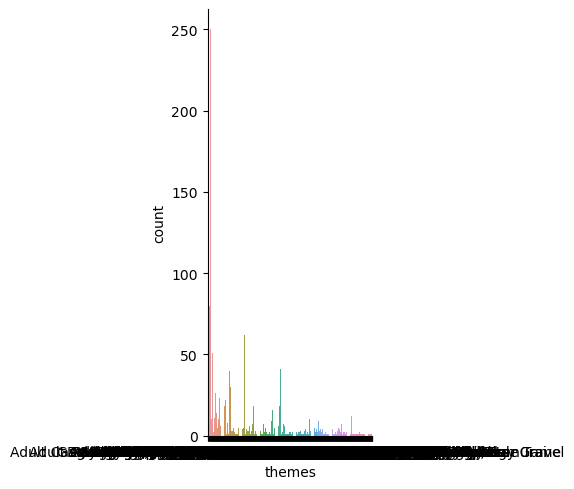

In [328]:
sns.catplot(x='themes', data=popular_anime, kind = 'count')

popular_anime['themes'].value_counts()

In [330]:
popular_anime['themes'].fillna('blank', inplace = True)
popular_anime[popular_anime['themes']=='blank']
Theme = [y for x in popular_anime['themes'] for y in x.split(',')]
unique_theme = []
theme_count =[]
for x in Theme:
    if x not in unique_theme:
        unique_theme.append(x)

for x in unique_theme:
    theme_count.append(Theme.count(x))

dict = {'unique_theme': unique_theme, 'theme_count': theme_count}
df4 = pd.DataFrame(dict)
print(df4)



        unique_theme  theme_count
0           Military           72
1              blank         1096
2               Gore           80
3           Military          199
4           Survival           43
..               ...          ...
92           Showbiz            4
93       Educational            6
94   Anthropomorphic            1
95           Samurai            2
96      Idols (Male)            1

[97 rows x 2 columns]


Let's do the correlation between these factors and the score

In [296]:
#correlation between scores and studios
#labels, categories = pd.factorize(popular_anime["studios"]) <- for catgories from dataset
#popular_anime["studio_labels"] = labels
#We are doing the correlation
abs(popular_anime["score"].corr(df['studio_count']))

0.33425967338988344

In [341]:
abs(popular_anime["score"].corr(df2['producer_count']))

0.26968384649187255

In [343]:
abs(popular_anime["score"].corr(df3['licensor_count']))

0.1636213496478246

In [345]:
abs(popular_anime["score"].corr(df4['theme_count']))

0.3390261468124884

In [346]:
labels, categories = pd.factorize(popular_anime["demographics"])
popular_anime["demo_labels"] = labels
abs(popular_anime["score"].corr(popular_anime['demo_labels']))

0.026591586838005533

In [347]:
labels1, categories1 = pd.factorize(popular_anime["type"])
popular_anime["type_labels"] = labels1
abs(popular_anime["score"].corr(popular_anime['type_labels']))

0.17215529771856652

In [348]:
labels2, categories2 = pd.factorize(popular_anime["status"])
popular_anime["status_labels"] = labels2
abs(popular_anime["score"].corr(popular_anime['status_labels']))

0.03561330431096537

In [349]:
labels3, categories3 = pd.factorize(popular_anime["source"])
popular_anime["source_labels"] = labels3
abs(popular_anime["score"].corr(popular_anime['source_labels']))

0.07666771083244983

In [350]:
labels4, categories4 = pd.factorize(popular_anime["rating"])
popular_anime["rating_labels"] = labels4
abs(popular_anime["score"].corr(popular_anime['rating_labels']))

0.21405981267652957

For some reason I can't do a heatmap, so i'll do the same process for our numeric factors, start_year and number of episodes

In [351]:
abs(popular_anime["score"].corr(popular_anime['score']))

1.0

In [352]:
abs(popular_anime["score"].corr(popular_anime['episodes']))

0.04308609417489273

In [353]:
abs(popular_anime["score"].corr(popular_anime['start_year']))

0.13941893104658518